## This notebook shows a deep learning regression model. The model is quite generic and can be applied to various data file. However, depending on the data source, you may have to perform additional preprocessing steps.
## Here we will predict the generation rate of a power plant for various input paramters

## Importing Libraries

In [1]:
import numpy as np

# assuming tensflow is installed in your machine, if you run in Colab, no need to install it.

import tensorflow as tf
import pandas as pd

In [4]:
url='https://raw.githubusercontent.com/ehsanece/ML_Data_Drive/main/power_plant.csv'
dataset = pd.read_csv(url)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(7654, 4)
(1914, 4)


## Perform the feture scaling on the data

In [ ]:
x_train -= x_train.mean(axis=0)
x_train /= x_train.std(axis=0)
x_test -= x_train.mean(axis=0)
x_test /= x_train.std(axis=0)

In [ ]:
x_val = x_train[:x_train.shape[0]//4]
x_train_1 = x_train[x_train.shape[0]//4:]

y_val = y_train[:x_train.shape[0]//4]
y_train_1 = y_train[x_train.shape[0]//4:]

## Building the ANN model by defining the hidden layer and the output layer

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(1)
])

model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


## Measure the performance of the deep learning regressor
## We are running for only 10 epochs to show the process. You can add more epochs to increase the accuracy

In [ ]:
h = model.fit(x_train_1,
              y_train_1,
              epochs=10,
              batch_size=1,
              validation_data=(x_val, y_val))

Epoch 1/10
5741/5741 [==============================] - 16s 3ms/step - loss: 32.8450 - mae: 4.4588 - val_loss: 29.7123 - val_mae: 4.1941
Epoch 2/10
5741/5741 [==============================] - 16s 3ms/step - loss: 31.3509 - mae: 4.3380 - val_loss: 25.1280 - val_mae: 3.8692
Epoch 3/10
5741/5741 [==============================] - 16s 3ms/step - loss: 30.8579 - mae: 4.2984 - val_loss: 20.9906 - val_mae: 3.6462
Epoch 4/10
5741/5741 [==============================] - 16s 3ms/step - loss: 30.3955 - mae: 4.2616 - val_loss: 24.1094 - val_mae: 3.9025
Epoch 5/10
5741/5741 [==============================] - 16s 3ms/step - loss: 30.7223 - mae: 4.3275 - val_loss: 24.5467 - val_mae: 3.8846
Epoch 6/10
5741/5741 [==============================] - 16s 3ms/step - loss: 30.7601 - mae: 4.3237 - val_loss: 46.4798 - val_mae: 5.7243
Epoch 7/10
5741/5741 [==============================] - 16s 3ms/step - loss: 30.0926 - mae: 4.2780 - val_loss: 24.8972 - val_mae: 3.9062
Epoch 8/10
5741/5741 [===================

##  Performance Visualization

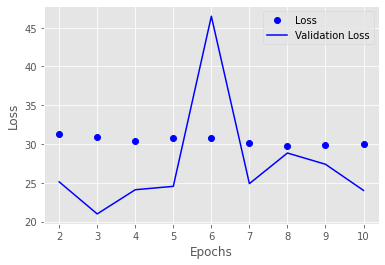

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(h.history['mae']) + 1)
plt.style.use('ggplot')
plt.plot(epochs[1:], h.history['loss'][1:], 'bo', 
         label='Loss')
plt.plot(epochs[1:], h.history['val_loss'][1:], 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

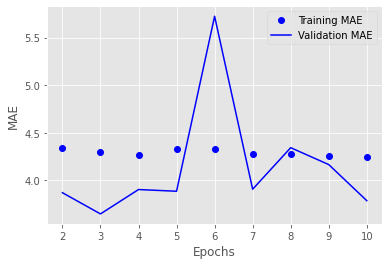

In [ ]:
plt.clf()
mae_values = h.history['mae']
val_mae_values = h.history['val_mae']

plt.plot(epochs[1:], mae_values[1:], 'bo', 
         label='Training MAE')
plt.plot(epochs[1:], val_mae_values[1:], 'b',
         label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend();

In [ ]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
test_mae_score

152.50223

***